In [358]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
import scipy.stats as stats
import researchpy as rp
import seaborn as sns
from statistics import mean


In [359]:
df = pd.read_csv('Life Expectancy Data.csv')
raw = pd.read_csv('Life Expectancy Data.csv')
pd.options.display.max_columns = 100
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [360]:
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [361]:
#clean data

df = df[['Country', 'Life expectancy ', 'Income composition of resources', 'Schooling', ' BMI ', 'GDP','Status','Year']]
df.rename(columns={'Life expectancy ': 'Life expectancy', ' BMI ':'BMI'}, inplace=True)
raw.rename(columns={'Life expectancy ': 'Life expectancy', ' BMI ':'BMI'}, inplace=True)
df['GDP'][df['Country'] == 'Viet Nam'] = 239.3

group_df = df.groupby(['Country']).mean().reset_index()
group_df.dropna(inplace=True)

group_countries = group_df['Country'].to_list()
df_countries = df['Country'].to_list()
idxs = []
for idx, country  in enumerate(df_countries):
    if country not in group_countries:
        idxs.append(idx)
df.drop(index=idxs, inplace=True)
df = df.reset_index().drop(columns='index')

dmm = ['Life expectancy', 'Income composition of resources', 'Schooling', 'BMI', 'GDP']
for i in dmm:
    df[i] = df[i].fillna(df.groupby('Country')[i].transform('mean'))

/usr/lib/python3/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/tmp/ipykernel_5168/3884226410.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GDP'][df['Country'] == 'Viet Nam'] = 239.3
/usr/lib/python3/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/lib/python3/dist-packages/pandas/co

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2496 non-null   object 
 1   Life expectancy                  2496 non-null   float64
 2   Income composition of resources  2496 non-null   float64
 3   Schooling                        2496 non-null   float64
 4   BMI                              2496 non-null   float64
 5   GDP                              2496 non-null   float64
 6   Status                           2496 non-null   object 
 7   Year                             2496 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 156.1+ KB


In [363]:
df.describe()

,Life expectancy,Income composition of resources,Schooling,BMI,GDP,Year
count,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000
mean,69.506851,0.633206,12.134615,38.201162,7468.772620,2007.500000
std,9.576895,0.210932,3.319725,19.994249,14256.880590,4.610696
min,36.300000,0.000000,0.000000,1.000000,1.681350,2000.000000
25%,63.500000,0.495750,10.200000,19.000000,456.829798,2003.750000
50%,72.400000,0.683000,12.400000,43.600000,1763.030833,2007.500000
75%,76.000000,0.787000,14.425000,56.100000,5887.278017,2011.250000
max,89.000000,0.948000,20.700000,77.600000,119172.741800,2015.000000


In [364]:
print(df['Country'].value_counts().to_string())

Afghanistan                 16
Oman                        16
Nepal                       16
Netherlands                 16
New Zealand                 16
Nicaragua                   16
Niger                       16
Nigeria                     16
Norway                      16
Pakistan                    16
Myanmar                     16
Panama                      16
Papua New Guinea            16
Paraguay                    16
Peru                        16
Philippines                 16
Poland                      16
Portugal                    16
Namibia                     16
Mozambique                  16
Albania                     16
Malaysia                    16
Lesotho                     16
Liberia                     16
Libya                       16
Lithuania                   16
Luxembourg                  16
Madagascar                  16
Malawi                      16
Maldives                    16
Morocco                     16
Mali                        16
Malta   

In [365]:
df

,Country,Life expectancy,Income composition of resources,Schooling,BMI,GDP,Status,Year
0,Afghanistan,65.0,0.479,10.1,19.1,584.259210,Developing,2015
1,Afghanistan,59.9,0.476,10.0,18.6,612.696514,Developing,2014
2,Afghanistan,59.9,0.470,9.9,18.1,631.744976,Developing,2013
3,Afghanistan,59.5,0.463,9.8,17.6,669.959000,Developing,2012
4,Afghanistan,59.2,0.454,9.5,17.2,63.537231,Developing,2011
...,...,...,...,...,...,...,...,...
2491,Zimbabwe,44.3,0.407,9.2,27.1,454.366654,Developing,2004
2492,Zimbabwe,44.5,0.418,9.5,26.7,453.351155,Developing,2003
2493,Zimbabwe,44.8,0.427,10.0,26.3,57.348340,Developing,2002
2494,Zimbabwe,45.3,0.427,9.8,25.9,548.587312,Developing,2001


In [366]:
# Sample equaly 400 country
developing_country = df[df['Status']=='Developing'][400:800]
developed_country = df[df['Status']=='Developed'][0:400]



In [367]:
print(developing_country.info())
print(developed_country.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 464 to 927
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          400 non-null    object 
 1   Life expectancy                  400 non-null    float64
 2   Income composition of resources  400 non-null    float64
 3   Schooling                        400 non-null    float64
 4   BMI                              400 non-null    float64
 5   GDP                              400 non-null    float64
 6   Status                           400 non-null    object 
 7   Year                             400 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 28.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 112 to 2063
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                          

In [368]:
classs = [developed_country['Life expectancy'],developing_country['Life expectancy']]

for i in classs:
    print('Mean:',scipy.mean([i]))
    print('Standard deviation',stats.tstd(i))
    
    print('-'*20)

Mean: 79.08149999999999
Standard deviation 4.0399890505819505
--------------------
Mean: 69.127
Standard deviation 9.877034500613826
--------------------


/tmp/ipykernel_5168/2256599340.py:4: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  print('Mean:',scipy.mean([i]))


In [369]:
stats.ttest_ind(developed_country['Life expectancy'],developing_country['Life expectancy'])

Ttest_indResult(statistic=18.65652797797466, pvalue=9.6127369622333e-65)

In [370]:
rp.ttest(group1= developing_country['Life expectancy'], group1_name= "Developing",
         group2= developed_country['Life expectancy'], group2_name= "Developed")

(     Variable      N      Mean        SD        SE  95% Conf.   Interval
 0  Developing  400.0  69.12700  9.877035  0.493852  68.156123  70.097877
 1   Developed  400.0  79.08150  4.039989  0.201999  78.684384  79.478616
 2    combined  800.0  74.10425  9.037224  0.319514  73.477064  74.731436,
                        Independent t-test   results
 0  Difference (Developing - Developed) =    -9.9545
 1                   Degrees of freedom =   798.0000
 2                                    t =   -18.6565
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     0.0000
 5               Difference > 0 p value =     1.0000
 6                            Cohen's d =    -1.3192
 7                            Hedge's g =    -1.3180
 8                       Glass's delta1 =    -1.0078
 9                     Point-Biserial r =    -0.5511)

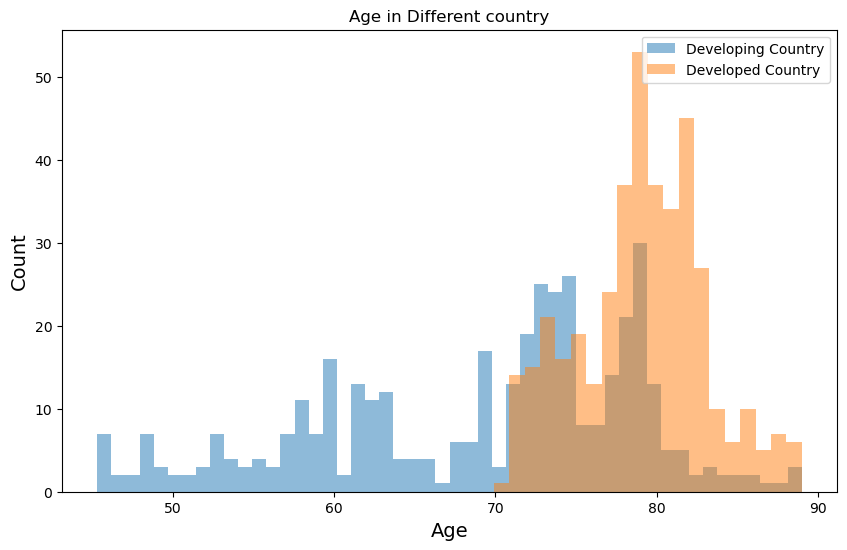

In [371]:
plt.figure(figsize=(10,6))
plt.hist(developing_country['Life expectancy'],bins=50,label='Developing Country',alpha=0.5)
plt.hist(developed_country['Life expectancy'],bins=20,label='Developed Country',alpha=0.5)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.legend(loc='upper right')
plt.title('Age in Different country')
plt.savefig('overlapping_histograms_with_matplotlib_Python.png')
plt.show()

In [372]:
Europe_country = ['Finland','France','Germany','Greece','Hungary','Italy','Poland','Sweden','Switzerland','Belgium']
Africa_country = ['Algeria','Angola','Togo','South Africa','Senegal','Nigeria','Mauritania','Liberia','Kenya','Ethiopia']
europe = df[df['Country'].isin(Europe_country)]
africa = df[df['Country'].isin(Africa_country)]

In [373]:
rp.ttest(group1= europe['Life expectancy'], group1_name= "Europe",
         group2= africa['Life expectancy'], group2_name= "Africa")

(   Variable      N       Mean         SD        SE  95% Conf.   Interval
 0    Europe  160.0  80.251875   3.869067  0.305877  79.647770  80.855980
 1    Africa  160.0  58.764375   7.284811  0.575915  57.626945  59.901805
 2  combined  320.0  69.508125  12.235295  0.683974  68.162456  70.853794,
                 Independent t-test   results
 0  Difference (Europe - Africa) =    21.4875
 1            Degrees of freedom =   318.0000
 2                             t =    32.9511
 3         Two side test p value =     0.0000
 4        Difference < 0 p value =     1.0000
 5        Difference > 0 p value =     0.0000
 6                     Cohen's d =     3.6840
 7                     Hedge's g =     3.6753
 8                Glass's delta1 =     5.5537
 9              Point-Biserial r =     0.8795)

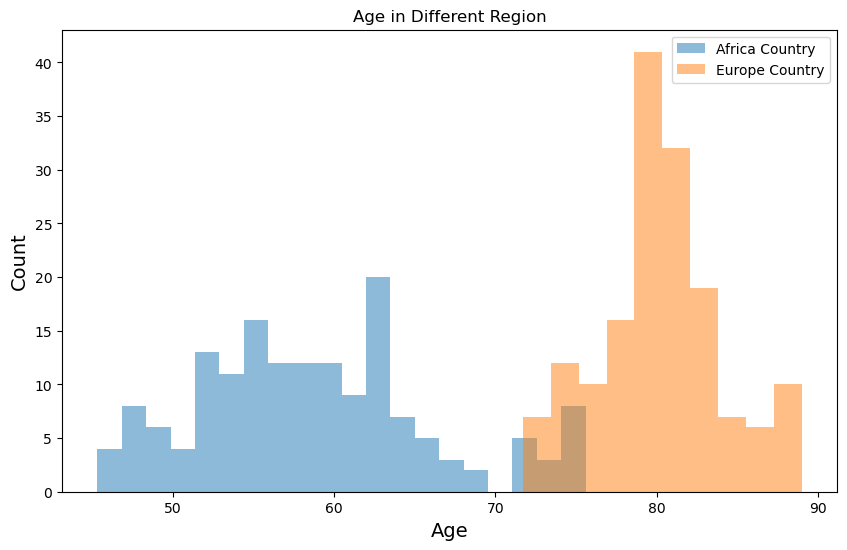

In [374]:
plt.figure(figsize=(10,6))
plt.hist(africa['Life expectancy'],bins=20,label='Africa Country',alpha=0.5)
plt.hist(europe['Life expectancy'],bins=10,label='Europe Country',alpha=0.5)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.legend(loc='upper right')
plt.title('Age in Different Region')
plt.savefig('overlapping_histograms_with_matplotlib_Python.png')
plt.show()

In [375]:
europe_in_16year = europe.groupby('Year').mean().reset_index()
africa_in_16year = africa.groupby('Year').mean().reset_index()

In [376]:
from sklearn.linear_model import LinearRegression
x = np.transpose(np.array(africa_in_16year['Year']).reshape(1,-1))
y = np.transpose(np.array(africa_in_16year['Life expectancy']).reshape(1,-1))
reg = LinearRegression().fit(x,y)
y_pred = reg.predict(x)

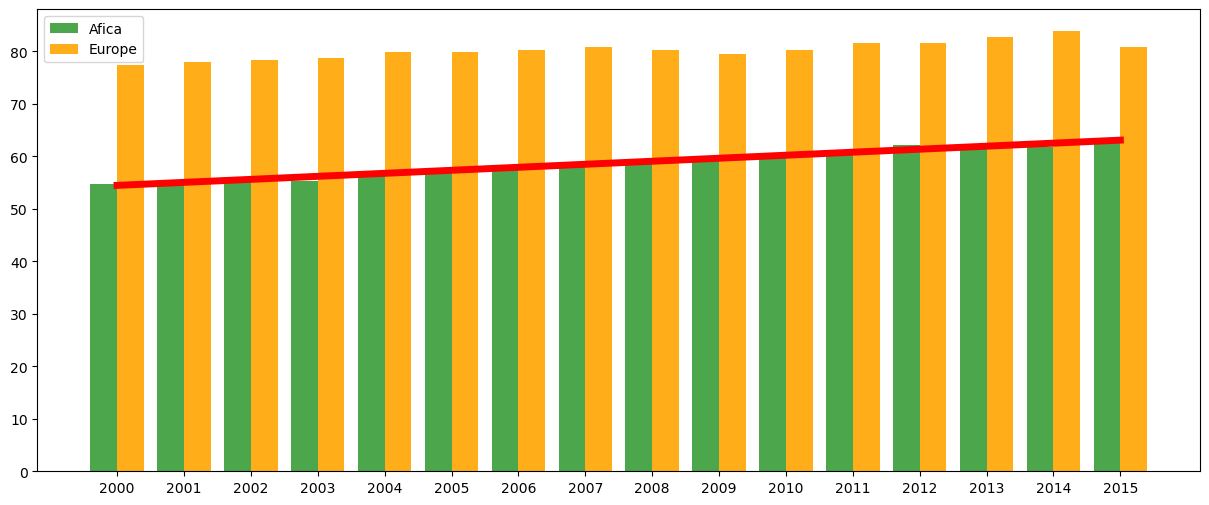

In [377]:

plt.figure(figsize=(15,6))
Datateam = [str(i) for i in range(2000,2016)]
x_axis = np.arange(16)
# Multi bar Chart
plt.bar(x_axis -0.2, africa_in_16year['Life expectancy'], width=0.4, label = 'Afica',color='green',alpha=0.7)
plt.bar(x_axis +0.2, europe_in_16year['Life expectancy'], width=0.4, label = 'Europe',color='orange',alpha=0.9)
plt.plot(y_pred,color='red',linewidth = 5)
# Xticks
plt.xticks(x_axis, Datateam)
# Add legend
plt.legend()
# Display
plt.show()

In [378]:
df['Schooling'].describe()

count    2496.000000
mean       12.134615
std         3.319725
min         0.000000
25%        10.200000
50%        12.400000
75%        14.425000
max        20.700000
Name: Schooling, dtype: float64

In [379]:
temp = raw[raw['Year']==2015]
age_in_15 = np.array(temp.loc[:,['Life expectancy']])

In [380]:
print(age_in_15.mean())
stats.ttest_1samp(age_in_15, popmean=71, alternative='two-sided')

71.61693989071038


Ttest_1sampResult(statistic=array([1.02733998]), pvalue=array([0.30562383]))

/tmp/ipykernel_5168/1589437977.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw['Life expectancy'], hist = False, kde = True, label='Americas')


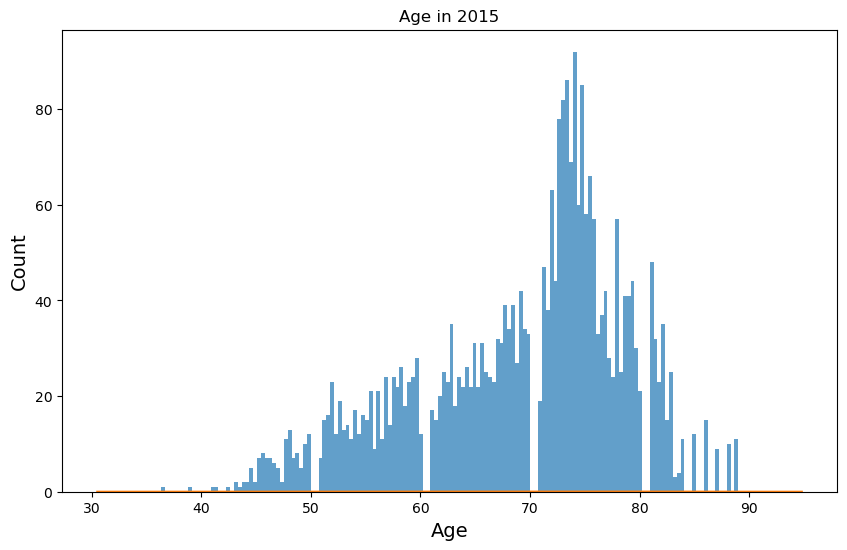

In [381]:
plt.figure(figsize=(10,6))
plt.hist(raw['Life expectancy'],bins=150,label='Europe Country',alpha=0.7)
sns.distplot(raw['Life expectancy'], hist = False, kde = True, label='Americas')
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.title('Age in 2015')
plt.show()